In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

heart_disease_df = pd.read_csv('./heart_disease_df_1.csv')
X_train, X_test = train_test_split(heart_disease_df, test_size=0.2, random_state=42)

## Normalization and Standardization

Feature scaling helps ensure that no feature dominates others during modeling. Normalization and Standardization are widely used feature scaling techniques. Normalization typically scales features in the range [0, 1] ensuring they have roughly the same scale. Standardization transforms the data to have zero mean and unit variance, maintaining more information about outliers and not bounding the range. matplotlib.pyplot has been imported as plt, MinMaxScaler and StandardScaler have been imported, and the split heart disease data features have been imported as X_train and X_test.

### Instructions 1/3
    - Plot the initial distribution of age.

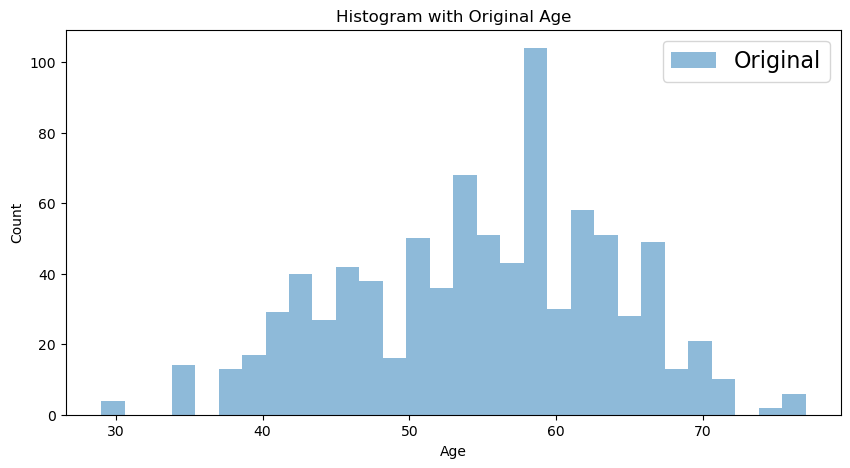

In [4]:
# Show the initial distribution of 'age'
age = X_train['age']
plt.figure(figsize=(10,5))
plt.hist(age, bins=30, alpha=0.5, label='Original')
plt.legend(prop={'size': 16})
plt.title('Histogram with Original Age'); 
plt.xlabel('Age'); plt.ylabel('Count');
plt.show()

### Instructions 2/3
    - Normalize and plot the age feature.

In [ ]:
# Normalize 'age' on the training set.
normalizer = MinMaxScaler()
X_train['age'] = normalizer.fit_transform(X_train['age'].values.reshape(-1,1))

# Use the same normalizer to transform the 'age' column of the test set to avoid data leakage
X_test['age'] = normalizer.transform(X_test['age'].values.reshape(-1,1))

plt.figure(figsize=(10,5))
plt.hist(X_train['age'], bins=30, alpha=0.5, label='Normalized')
plt.legend(prop={'size': 16})
plt.title('Histogram with Normalized Age')
plt.xlabel('Normalized Age')
plt.ylabel('Count')
plt.show()

### Instructions 3/3
    - Standardize and plot the age feature.

In [7]:
from sklearn.preprocessing import StandardScaler

X_train, X_test = train_test_split(heart_disease_df, test_size=0.2, random_state=42)

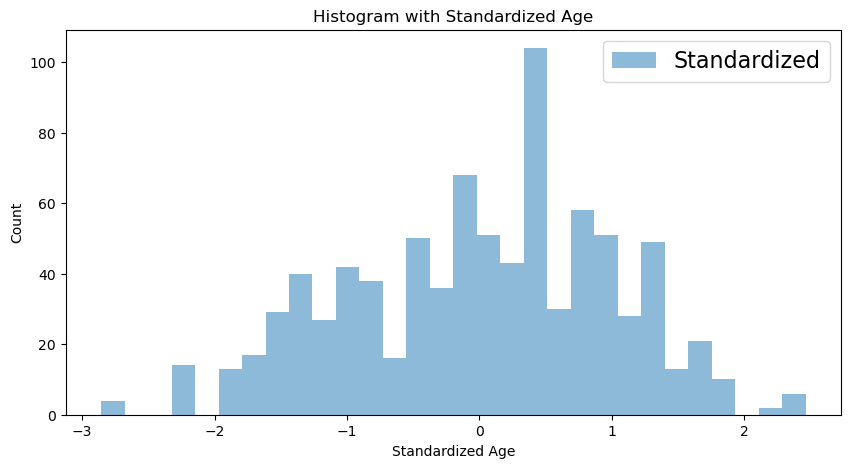

In [8]:
# Standardize 'age' on the training set and use the same standardizer to transform the 'age' column of the test set to avoid data leakage
standardizer = StandardScaler()
X_train['age'] = standardizer.fit_transform(X_train['age'].values.reshape(-1,1))
X_test['age'] = standardizer.transform(X_test['age'].values.reshape(-1,1))

plt.figure(figsize=(10,5))
plt.hist(X_train['age'], bins=30, alpha=0.5, label='Standardized')
plt.legend(prop={'size': 16})
plt.title('Histogram with Standardized Age')
plt.xlabel('Standardized Age')
plt.ylabel('Count')
plt.show()

## Feature selection

While preparing your data for modeling, it is important to ensure that you have a set of helpful features for the model to base its predictions (or diagnosis) on. In order to be helpful, features need to capture essential characteristics of the heart disease dataset in an orthogonal way; more data isn't always better!

You can use the sklearn.feature_selection.SelectFromModel module to select useful features. SelectFromModel implements a brute-force method that uses a RandomForestClassifier model to find the most salient features for the task of heart disease diagnosis.

RandomForestClassifier has been imported and the heart disease data features and target have been imported as X_train and y_train, respectively.

### Instructions 1/4
    - Define a random forest classifier with n_jobs = -1, 'balanced' class_weight, and max_depth = 5, and perform feature selection on heart_disease_df using .fit().

In [29]:
from sklearn.ensemble import RandomForestClassifier

df = heart_disease_df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'slope', 'ca', 'thal', 'target']].dropna()

features = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca', 'thal']]
heart_disease_y = df['target']

X_train, X_test, y_train, y_test = train_test_split(features, heart_disease_y, test_size=0.2, random_state=42)

In [30]:
from sklearn.feature_selection import SelectFromModel

# Define the random forest model and fit to the training data
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

### Instructions 2/4
    - Define the feature selection object using the rf classifier you have created.

In [31]:
from sklearn.feature_selection import SelectFromModel

In [32]:
from sklearn.feature_selection import SelectFromModel

# Define the random forest model and fit to the training data
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
rf.fit(X_train, y_train)

# Define the feature selection object
model = SelectFromModel(rf, prefit=True)

### Instructions 3/4
    - Run the feature selector model on the training features of the heart disease DataFrame.

In [33]:
from sklearn.feature_selection import SelectFromModel

# Define the random forest model and fit to the training data
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
rf.fit(X_train, y_train)

# Define the feature selection object
model = SelectFromModel(rf, prefit=True)

# Transform the training features
X_train_transformed = model.transform(X_train)

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### Instructions 4/4
    - Get the selected features from the feature selector object, filter the DataFrame based on the features and print the selected features out.

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Original features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

Selected features: ['age', 'cp', 'thalach', 'oldpeak', 'slope', 'ca']


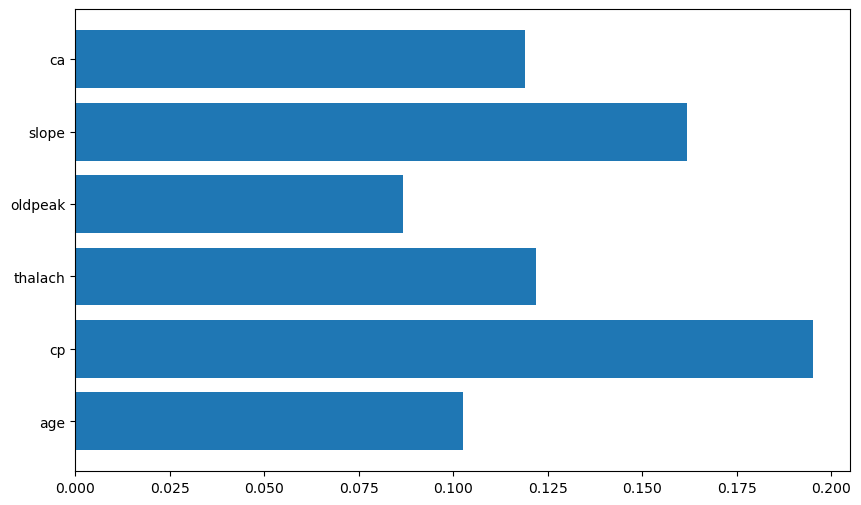

In [34]:
from sklearn.feature_selection import SelectFromModel

# Define the random forest model and fit to the training data
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
rf.fit(X_train, y_train)

# Define the feature selection object
model = SelectFromModel(rf, prefit=True)

# Transform the training features
X_train_transformed = model.transform(X_train)

original_features = heart_disease_df.columns[:-1]
print(f"Original features: {original_features}")

# Select the features deemed important by the SelectFromModel
features_bool = model.get_support()

selected_features = [feature for feature, is_selected in zip(original_features, features_bool) if is_selected]
print(f"\nSelected features: {selected_features}")

feature_importance = pd.DataFrame({
    "feature": selected_features,
    "importance": rf.feature_importances_[features_bool]
})
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["feature"], feature_importance["importance"])
plt.show()

## Training a model

In the video, you learned how to train a model using scikit learn. In this exercise, you will demonstrate your new skills by training a support vector classifier (SVC) model on the heart disease dataset. Your job is to split the data into training and testing portions, define the necessary model with the correct parameters, and train it on the split data. The heart disease data features and target have been imported as heart_disease_X and heart_disease_y, respectively.

### Instructions 1/4
    - Import the train_test_split function and the SVC model type from sklearn.

In [37]:
df = heart_disease_df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'slope', 'ca', 'thal', 'target']].dropna()

heart_disease_X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca', 'thal']]
heart_disease_y = df['target']

standardizer = StandardScaler()
heart_disease_X = standardizer.fit_transform(heart_disease_X)

In [38]:
# Import required modules
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

### Instructions 2/4
    - Split the heart_disease data into 80% training and 20% testing.
    - Make sure to name your variables as heart_disease_X and heart_disease_y.

In [39]:
# Import required modules
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(heart_disease_X, heart_disease_y, test_size=.2, random_state=42)

### Instructions 3/4
    - Create a SVC model using a linear kernel and train the SVC model on the training data splits.

In [ ]:
# Import required modules
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(heart_disease_X, heart_disease_y, test_size=0.2, random_state=42)

# Define the SVM / SVC model
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

### Instructions 4/4
    - Call the trained model on the test patient data to get example heart disease diagnosis predictions.

In [40]:
# Import required modules
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(heart_disease_X, heart_disease_y, test_size=0.2, random_state=42)

# Define the SVM / SVC model
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Get predictions from the model
y_pred = svc_model.predict(X_test)
print(y_pred)

[0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0
 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1
 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0]


## MLFlow for logging and retrieving data

MLflow is an open-source platform for managing the ML lifecycle. It can be used to keep track of experiments, packaging code into reproducible runs, and sharing and deploying models. In the following exercise, you will log some of the parameters of a training experiment for your heart disease model. mlflow is imported, and the trained heart disease model has been loaded for you.

### Instructions
    - Initialize an MLflow experiment named "Logistic Regression Heart Disease Prediction".
    - Start a run, and log the trained models coefficient and intercept.

In [41]:
import mlflow

ModuleNotFoundError: No module named 'mlflow'

In [42]:
# Initialize the MLflow experiment
mlflow.set_experiment("Logistic Regression Heart Disease Prediction")

# Start a run, log model coefficients and intercept
with mlflow.start_run():
    for idx, coef in enumerate(model.coef_[0]):
        mlflow.log_param(f"coef_{idx}", coef)
    mlflow.log_param("intercept", model.intercept_[0])
	
    run_id = mlflow.active_run().info.run_id
    print(run_id)

NameError: name 'mlflow' is not defined

## KFold cross validation

When working with ML models, it's essential to evaluate their performance on unseen data while ensuring that. One common technique for this purpose is k-fold cross-validation. In this exercise, you'll explore how the k-fold cross-validation technique splits a dataset into training and testing sets. KFold is imported for you, as well as the heart disease dataset features heart_disease_df_X.

### Instructions
    - Create a KFold object with n_splits=5, shuffle=True, and random_state=42
    - Split the data using kfold.split()
    - Print out the number of datapoints in the train and test splits

In [46]:
from sklearn.model_selection import cross_val_score, KFold
heart_disease_df_X = heart_disease_X

In [47]:
# Create a KFold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Get the train and test data from the first split from the shuffled KFold
train_data_split, test_data_split = next(kfold.split(heart_disease_df_X))

# Print out the number of datapoints in the train and test splits
print("Number of training datapoints in heart_disease_df_X:", len(heart_disease_df_X))
print("Number of training datapoints in split:", len(train_data_split))
print("Number of testing datapoints in split:", len(test_data_split))

Number of training datapoints in heart_disease_df_X: 925
Number of training datapoints in split: 740
Number of testing datapoints in split: 185


## Evaluating a model

Throughout this course, you've been working on a project to classify heart disease using machine learning. You've successfully cleaned the dataset, performed feature engineering, and trained your model.

Here, you will employ the methods you have learned so far for model evaluation. You will evaluate a machine learning model using appropriate error metrics, visualize the evaluation results, and identify potential overfitting in preparation for deployment. By the end of this exercise, you will have gained a deeper understanding of model evaluation and visualization techniques.

    - The trained logistic regression model is loaded as model
    - KFold and cross_val_score are imported from sklearn.model_selection
    - confusion_matrix is imported from sklearn.metrics.
    - The variables heart_disease_df_X and heart_disease_df_y have been already imported.

### Instructions 1/4
    - Create a sklearn KFold object with 5 folds.

In [48]:
# Evaluate model using k-fold cross-validation
kf = KFold(n_splits=5)

### Instructions 2/4
    - Get the balanced accuracy cross validation score for the model and print it.

In [ ]:
# Evaluate model using k-fold cross-validation
kf = KFold(n_splits=5)

# Compute the cross-validation score
score = cross_val_score(model, heart_disease_df_X, 
                heart_disease_df_y, scoring='balanced_accuracy', cv=kf)
print(score)

### Instructions 3/4
    - Use the model to predict the output for the given inputs heart_disease_df_X.

In [ ]:
# Evaluate model using k-fold cross-validation
kf = KFold(n_splits=5)

# Compute the cross-validation score
score = cross_val_score(model, heart_disease_df_X, heart_disease_df_y, scoring='balanced_accuracy', cv=kf)
print(score)

# Get model predictions
y_pred = model.predict(heart_disease_df_X)

### Instructions 4/4
    - Create and print out the confusion matrix for the model's predicted values to see the number of true and false negatives and identify potential overfitting.

In [ ]:
# Evaluate model using k-fold cross-validation
kf = KFold(n_splits=5)

# Compute the cross-validation score
score = cross_val_score(model, heart_disease_df_X, heart_disease_df_y, scoring='balanced_accuracy', cv=kf)
print(score)

# Get model predictions
y_pred = model.predict(heart_disease_df_X)

# Print confusion matrix
cm = confusion_matrix(heart_disease_df_y, y_pred)
print(cm)